In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Model
from keras.layers import *
import tensorflow as tf
from keras import optimizers
from keras.utils import np_utils
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.matrix(df_train)

In [5]:
# The first column contains the label, so we'll store it in a separate array.
output = data[:,0]

In [6]:
data = np.delete(data, 0, 1)

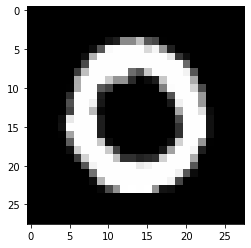

In [7]:
# Visualising what the image looks like
img = data[1].reshape(28,28)
plt.imshow(img, cmap="gray")

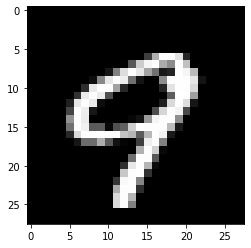

In [8]:
img = data[100].reshape(28,28)
plt.imshow(img, cmap="gray")

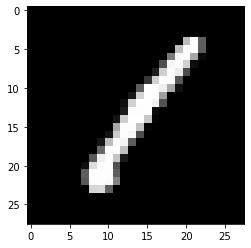

In [9]:
img = data[0].reshape(28,28)
plt.imshow(img, cmap="gray")

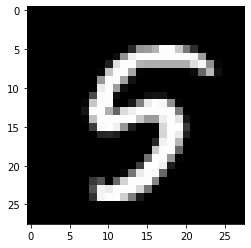

In [10]:
img = data[8].reshape(28,28)
plt.imshow(img, cmap="gray")

In [11]:
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

In [12]:
X_test = df_test.iloc[:, 0:784]

In [13]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_test.shape

(28000, 784)

In [15]:
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, test_size=.2, random_state = 1904)

In [16]:
X_train.shape

(33600, 784)

In [17]:
X_train = X_train.values.reshape(33600, 784)

In [18]:
X_cv.shape

(8400, 784)

In [19]:
X_cv = X_cv.values.reshape(8400, 784)

In [20]:
X_test = X_test.values.reshape(28000, 784)

In [21]:
print((min(X_train[1]), max(X_train[1])))

(0, 255)


In [22]:
# Normalize the dataset(Feature Normalization)
X_train = X_train.astype("float32")
X_cv = X_cv.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_cv /= 255
X_test /= 255

In [23]:
num_digits = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_digits)
y_cv = keras.utils.np_utils.to_categorical(y_cv, num_digits)

In [24]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)
print(y_train.shape)
print(y_cv.shape)

(33600, 784)
(28000, 784)
(8400, 784)
(33600, 10)
(8400, 10)


In [26]:
# Modeling the network
# Input parameters
n_input = 784   # Number of input features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10   # Output layer

In [27]:
Inp = Input(shape = (784,))
x = Dense(n_hidden_1, activation = "relu", name = "Hidden_Layer_1")(Inp)   # First input layer
x = Dense(n_hidden_2, activation = "relu", name = "Hidden_Layer_2")(x)    #Second input
x = Dense(n_hidden_3, activation = "relu", name = "Hidden_Layer_3")(x)    #Third input
x = Dense(n_hidden_4, activation = "relu", name = "Hidden_Layer_4")(x)    #Fourth input
output = Dense(num_digits, activation = "softmax", name = "Output_Layer")(x)  #Output layer

In [28]:
model = Model(Inp, output)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 300)               235500    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 100)               30100     
                                                                 
 Hidden_Layer_3 (Dense)      (None, 100)               10100     
                                                                 
 Hidden_Layer_4 (Dense)      (None, 200)               20200     
                                                                 
 Output_Layer (Dense)        (None, 10)                2010      
                                                                 
Total params: 297,910
Trainable params: 297,910
Non-trainable

In [30]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [31]:
history1 = model.fit(X_train, y_train,
                    batch_size = 100,
                    epochs = 7,
                    validation_data=(X_cv, y_cv))

Epoch 1/7
336/336 [==============================] - 6s 11ms/step - loss: 1.9053 - accuracy: 0.4220 - val_loss: 1.1389 - val_accuracy: 0.7344
Epoch 2/7
336/336 [==============================] - 3s 9ms/step - loss: 0.6968 - accuracy: 0.8156 - val_loss: 0.4834 - val_accuracy: 0.8646
Epoch 3/7
336/336 [==============================] - 3s 9ms/step - loss: 0.4091 - accuracy: 0.8832 - val_loss: 0.3647 - val_accuracy: 0.8955
Epoch 4/7
336/336 [==============================] - 3s 9ms/step - loss: 0.3315 - accuracy: 0.9026 - val_loss: 0.3257 - val_accuracy: 0.9037
Epoch 5/7
336/336 [==============================] - 3s 9ms/step - loss: 0.2931 - accuracy: 0.9128 - val_loss: 0.2910 - val_accuracy: 0.9133
Epoch 6/7
336/336 [==============================] - 3s 9ms/step - loss: 0.2663 - accuracy: 0.9224 - val_loss: 0.2718 - val_accuracy: 0.9189
Epoch 7/7
336/336 [==============================] - 3s 10ms/step - loss: 0.2452 - accuracy: 0.9293 - val_loss: 0.2526 - val_accuracy: 0.9245


In [32]:
## Optimization algorithm
## ADAGRAD
## RMSPROP
## ADAM

In [33]:
## Using ADAM as our optimization algorithm
adam = tf.keras.optimizers.Adam(lr = 0.1)

C:\Users\Administrator\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [34]:
model2 = Model(Inp, output)

In [35]:
model2.compile(loss = "categorical_crossentropy",
              optimizer =  adam,
              metrics = ["accuracy"])

In [36]:
history2 = model2.fit(X_train, y_train,
                    batch_size = 100,
                    epochs = 7,
                    validation_data=(X_cv, y_cv))

Epoch 1/7
336/336 [==============================] - 5s 11ms/step - loss: 34.5173 - accuracy: 0.2670 - val_loss: 1.8145 - val_accuracy: 0.3067
Epoch 2/7
336/336 [==============================] - 3s 10ms/step - loss: 1.3171 - accuracy: 0.4709 - val_loss: 1.1582 - val_accuracy: 0.5610
Epoch 3/7
336/336 [==============================] - 3s 10ms/step - loss: 1.1817 - accuracy: 0.5481 - val_loss: 1.2539 - val_accuracy: 0.5361
Epoch 4/7
336/336 [==============================] - 3s 10ms/step - loss: 1.2162 - accuracy: 0.5532 - val_loss: 1.1769 - val_accuracy: 0.5449
Epoch 5/7
336/336 [==============================] - 3s 10ms/step - loss: 1.1078 - accuracy: 0.5587 - val_loss: 1.0546 - val_accuracy: 0.5814
Epoch 6/7
336/336 [==============================] - 3s 10ms/step - loss: 1.0366 - accuracy: 0.5809 - val_loss: 1.0765 - val_accuracy: 0.5574
Epoch 7/7
336/336 [==============================] - 3s 10ms/step - loss: 1.0354 - accuracy: 0.5776 - val_loss: 1.0374 - val_accuracy: 0.5813


In [37]:
adam = tf.keras.optimizers.Adam(lr = 0.01)
model3 = Model(Inp, output)
model3.compile(loss = "categorical_crossentropy",
              optimizer =  adam,
              metrics = ["accuracy"])
history3 = model2.fit(X_train, y_train,
                    batch_size = 100,
                    epochs = 15,
                    validation_data=(X_cv, y_cv))

Epoch 1/15
336/336 [==============================] - 4s 11ms/step - loss: 1.1022 - accuracy: 0.5601 - val_loss: 1.3528 - val_accuracy: 0.4924
Epoch 2/15
336/336 [==============================] - 3s 10ms/step - loss: 1.0497 - accuracy: 0.5699 - val_loss: 1.0855 - val_accuracy: 0.5643
Epoch 3/15
336/336 [==============================] - 3s 10ms/step - loss: 1.2430 - accuracy: 0.5148 - val_loss: 1.5583 - val_accuracy: 0.4039
Epoch 4/15
336/336 [==============================] - 3s 10ms/step - loss: 1.3431 - accuracy: 0.4160 - val_loss: 1.2588 - val_accuracy: 0.4356
Epoch 5/15
336/336 [==============================] - 3s 10ms/step - loss: 1.6276 - accuracy: 0.3698 - val_loss: 2.0905 - val_accuracy: 0.2400
Epoch 6/15
336/336 [==============================] - 3s 10ms/step - loss: 1.8746 - accuracy: 0.2735 - val_loss: 1.8306 - val_accuracy: 0.2998
Epoch 7/15
336/336 [==============================] - 3s 10ms/step - loss: 1.8673 - accuracy: 0.2714 - val_loss: 1.7313 - val_accuracy: 0.2875

In [38]:
adam = tf.keras.optimizers.Adam(lr = 0.001)
model4 = Model(Inp, output)
model4.compile(loss = "categorical_crossentropy",
              optimizer =  adam,
              metrics = ["accuracy"])
history4 = model4.fit(X_train, y_train,
                    batch_size = 100,
                    epochs = 10,
                    validation_data=(X_cv, y_cv))

Epoch 1/10
336/336 [==============================] - 5s 11ms/step - loss: 1.9676 - accuracy: 0.1978 - val_loss: 1.9784 - val_accuracy: 0.2004
Epoch 2/10
336/336 [==============================] - 3s 9ms/step - loss: 1.9596 - accuracy: 0.1979 - val_loss: 1.9753 - val_accuracy: 0.2004
Epoch 3/10
336/336 [==============================] - 3s 10ms/step - loss: 1.9565 - accuracy: 0.1979 - val_loss: 1.9742 - val_accuracy: 0.2005
Epoch 4/10
336/336 [==============================] - 3s 9ms/step - loss: 1.9551 - accuracy: 0.1979 - val_loss: 1.9734 - val_accuracy: 0.2005
Epoch 5/10
336/336 [==============================] - 3s 10ms/step - loss: 1.9539 - accuracy: 0.1979 - val_loss: 1.9718 - val_accuracy: 0.2005
Epoch 6/10
336/336 [==============================] - 3s 10ms/step - loss: 1.9533 - accuracy: 0.1979 - val_loss: 1.9721 - val_accuracy: 0.2004
Epoch 7/10
336/336 [==============================] - 3s 10ms/step - loss: 1.9527 - accuracy: 0.1979 - val_loss: 1.9696 - val_accuracy: 0.2006
E

In [39]:
## Inference
test_pred = pd.DataFrame(model.predict(X_test, batch_size = 100))
test_pred = pd.DataFrame(test_pred.idxmax(axis=1))
test_pred.index.name = "ImageId"
test_pred = test_pred.rename(columns={0:"label"}).reset_index()
test_pred["ImageId"] = test_pred["ImageId"] + 1

In [40]:
test_pred = pd.DataFrame(model.predict(X_test, batch_size = 200))

In [41]:
test_pred.head()

,0,1,2,3,4,5,6,7,8,9
0,0.007866,0.170956,0.148620,0.046493,0.168555,0.022460,0.048926,0.182508,0.035774,0.167844
1,0.212981,0.035850,0.034740,0.177933,0.003896,0.181743,0.164797,0.001639,0.179473,0.006949
2,0.007866,0.170956,0.148620,0.046493,0.168555,0.022460,0.048926,0.182508,0.035774,0.167844
3,0.007866,0.170956,0.148620,0.046493,0.168555,0.022460,0.048926,0.182508,0.035774,0.167844
4,0.066055,0.135279,0.123974,0.150881,0.045677,0.104875,0.149223,0.031243,0.132416,0.060377
